Markdown cell


In [73]:
#import statements
import numpy as np
import matplotlib.pyplot as plt

# changing theme
plt.style.use('dark_background')


In [74]:
def entropy(pmf: np.array) -> float:
    """This function returns the entropy of the given pmf 

    The formula used is : -sum p(x) log p(x)

    Example
    --------
    >>> p = np.array([0.5, 0.5])
    >>> entropy(p)
    1.0
    """
    
    return -np.sum(pmf*np.log2(pmf))

def KL_divergence(p: np.array, q: np.array) -> float:
    """This function returns the KL divergence between the two given pmfs
    
    The formula used is : sum p(x) log p(x)/q(x) 
    
    Example
    -------
    >>> p = np.array([0.5, 0.5])
    >>> q = np.array([0.6, 0.4])
    >>> KL_divergence(p, q)
    0.029446844526784283
    """
    idx = np.argwhere( q == 0.0 )
    q[idx]+=1e-5
    idx = np.argwhere( p == 0.0 )
    p[idx]+=1e-5
    return np.sum(p * np.log2(p/q)) 

def cross_entropy(p: np.array, q:np.array) -> float:
    """This function returns the cross entropy betwen the two given pmfs
    
    The formula used is : H(p) + D(p||q)
    
    Example
    -------
    >>> p = np.array([0.5, 0.5])
    >>> q = np.array([0.6, 0.4])
    >>> cross_entropy(p, q)
    1.0294468445267844
    """
    return entropy(p)+KL_divergence(p, q)

def JS_divergence(p: np.array, q:np.array) -> float:
    """This function return the Jenson Shannon divergence between
    the given two pmfs
    
    The formula used is : D(p||m)+D(q||m), where
    m = (p+q)/2
    
    Example
    -------
    >>> p = np.array([0.5, 0.5])
    >>> q = np.array([0.6, 0.4])
    >>> JS_divergence(p, q)
    0.014598313520947925
    """
    m = (p+q)/2
    return KL_divergence(p, m) + KL_divergence(q, m)

def checkValidTuple(pmf : np.array, rx: np.array, sy: np.array, tolerance: float = 1e-6) -> bool:
    """This function returns wether or not the given tuple of pmf, marginals
    is valid

    Optional Argument
    -----------------
    Tolerance: There can be error calculating probabilities, it might be worth adding a tolerance which
    if sort of a measure of how much error can be accomodated.
    
    Condition used
    --------------
    sum_over(i) p_ij = s
    
    sum_over(j) p_ij = r
    
    Example
    -------
    >>> rx = np.array([0.5, 0.25, 0.125, 0.125])
    >>> sy = np.array([0.25, 0.25, 0.25, 0.25])
    >>> ValidPmf = np.array([[0.125, 0.0625, 0.0625, 0.25], [1/16, 1/8, 1/16, 0], [1/32, 1/32, 1/16, 0], [1/32, 1/32, 1/16, 0]])
    >>> checkValidTuple(ValidPmf, rx, sy)
    True
    >>> InvalidPmf = np.array([[0.125, 0.0625, 0.0625, 0.25], [1/16, 1/8, 1/16, 0], [1/32, 1/32, 1/16, 0], [1/32, 1/32, 0, 1/16]])
    >>> checkValidTuple(InvalidPmf, rx, sy)
    False
    """
    rx_calc = np.sum(pmf, axis=1)
    sy_calc = np.sum(pmf, axis=0)
    
    if np.linalg.norm(rx_calc-rx)<tolerance:
        if np.linalg.norm(sy_calc-sy)<tolerance:
            return True
    return False

p = np.array([0.5, 0.5])
q = np.array([0.6, 0.4])
rx = np.array([0.5, 0.25, 0.125, 0.125])
sy = np.array([0.25, 0.25, 0.25, 0.25])
ValidPmf = np.array([[0.125, 0.0625, 0.0625, 0.25], [1/16, 1/8, 1/16, 0],\
     [1/32, 1/32, 1/16, 0], [1/32, 1/32, 1/16, 0]])
InvalidPmf = np.array([[0.125, 0.0625, 0.0625, 0.25], [1/16, 1/8, 1/16, 0],\
     [1/32, 1/32, 1/16, 0], [1/32, 1/32, 0, 1/16]])
# print(entropy(p))
# print(KL_divergence(p, q))
# print(cross_entropy(p, q))
# print(checkValidTuple(ValidPmf, rx, sy))
# print(checkValidTuple(InvalidPmf, rx, sy))


# Question-2
## Part-a
### i) What is the crowding problem?
Crowding problem refers to the problem when we are not able to reproduce the distances from higher dimensional space to lower dimensional space. Consider the case of a regular tetrahedron in three dimensions, it is not possible to have four points in two dimensions which are equidistant from one another. In case of SNE, the cost of representing data points which are close in higher dimensions as far apart in lower dimension is high, which can be seen in this plot (taken from the paper).         
![make sure you have downloaded the image](gradient_sne.png )

### ii) How does the choice of the Student t-distribution in the low dimensional embedding space help address the crowding problem?
Student t-distribution is heavy tailed, it allows moderatly dissimilar points to be placed somewhat apart, it can be seen in below image.       
![make sure you have downloaded the image](gradient_tsne.png )      
t-SNE allows these points to be placed far apart, unlike in sne which has some attractive forces between moderately dissimilar datapoints, the repulsive forces between moderatly dissimilar points depends on the 

### iii) What other important changes have been made in t-SNE relative to SNE?
In t-SNE, the pmf matrix has been made symmetric
$\begin{align}
p_{ij} = \frac{p_{i|j}+p_{j|i}}{2n}
\end{align}$        
where $p_{i|j}$ is calculated in the same way as in SNE, we made the pmf symmetric, this is done so that each data point can have significant impact on the gradient.       
Apart from this and introduction of student t distribution, it is important to note that the matrix $q$ is also symmetric.


### Part-b

In [82]:
dimensions = 10
mu1 = np.ones(dimensions)
mu2 = 10*mu1
cov = 0.01*np.eye(dimensions)
# mu = [1]*10, cov = 0.01 I
cluster1 = np.random.multivariate_normal(mu1,cov,10)
# mu = [10]*10, cov = 0.01 I
cluster2 = np.random.multivariate_normal(mu2,cov,10)
# stacking the two clusters in the same matrix
X = np.vstack((cluster1,cluster2))



class tsne:
    def __init__(self, X) -> None:
        self.X = X
        self.Y = None
    
    
    def calc_p_util(self) -> np.array:
        """Calculates the p matrix"""
        (m,n) = self.X.shape
        s = 0.3*np.ones(m)        
        p = np.zeros( (m, m) )
        for i in range(m):
            denominator = -1
            for j in range(m):
                denominator += np.exp( -(np.linalg.norm(self.X[i]-self.X[j])**2)/(2*s[i]**2) )
            
            for j in range(m):
                if j == i:
                    continue
                p[i,j] = np.exp( -(np.linalg.norm(self.X[i]-self.X[j])**2)/(2*s[i]**2) )/denominator

        p = (p+p.T)/(2*m)
        return p

    def calc_q_util(self) -> np.array:
        """Calculates the q matrix"""
        (m, n) = self.Y.shape         
        q = np.zeros((m,m))

        denominator = 0
        for i in range(m):
            for j in range(m):
                if i==j:
                    continue
                denominator += 1/(1 + np.linalg.norm(self.Y[i]-self.Y[j])**2)
        for i in range(m):
            for j in range(m):
                if i==j:
                    continue
                q[i,j] = (1/(1+ np.linalg.norm(self.Y[i]-self.Y[j])**2))/denominator
        return q

    def calc_gradient_util(self, learning_rate: float, p:np.array, q:np.array) -> np.array:
        """Calculates the gradient"""
        (m,n) = self.Y.shape
        gradient = np.zeros((m,n))
        for i in range(m):
            for j in range(m):
                gradient[i]+=(p[i,j]-q[i,j])*(self.Y[i]-self.Y[j])/(1+np.linalg.norm(self.Y[i]-self.Y[j])**2)
        return gradient

    def process(self, T:int, momentum_decay_func, learning_rate:float, dimensions:int, plot: bool = False) -> None:
        """It will print initial and final divergence
        after performing t-SNE"""
        (m,n) = self.X.shape
        mean = np.zeros(dimensions)
        cov = (1e-4)*np.eye(dimensions)
        
        self.Y = np.random.multivariate_normal(mean, cov, m)
        if plot:
            fig = plt.figure()
            ax = fig.subplots()
            ax.scatter( self.Y[:10,0],self.Y[:10,1], marker = '^', label = "class 1")
            ax.scatter( self.Y[10:,0],self.Y[10:,1], marker = 's', label = "class 2")
            ax.set_title("before t-SNE")
            ax.legend()
        p = self.calc_p_util()
        q = self.calc_q_util()
        print("initial divergence:",KL_divergence(p.flatten(), q.flatten()))
        change = self.Y.copy()
        for t in range(T):
            gradient = self.calc_gradient_util(learning_rate,p ,q)
            new_change =  4*learning_rate*gradient + momentum_decay_func(t)*(change)
            self.Y -= new_change
            change = new_change
            q = self.calc_q_util()

            # print(np.linalg.norm(gradient))
        # print(np.linalg.norm(gradient))
        print("final divergence:",KL_divergence(p, q))
        if plot:
            return ax

# momentum decay function
def alpha(t:int) -> float:
    return 0.99

I tried with momentum decay function as 
1. constant (0.99)
2. decaying function $\frac{1}{1+\frac{t}{50}}$

The constant function seems to give consisten result for randomised initialisation

initial divergence: 1.1252021553664489
final divergence: 0.025526733648353256


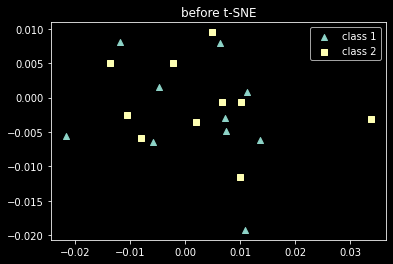

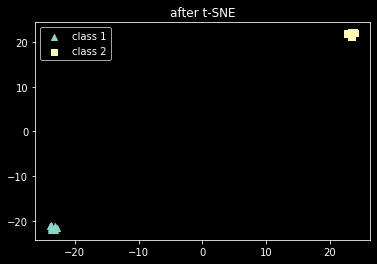

In [83]:
mytsne = tsne(X)
mytsne.process(50, alpha, 10,2, plot=True)

Y = mytsne.Y
fig = plt.figure()
ax = fig.subplots()
ax.scatter( Y[:10,0],Y[:10,1], marker = '^', label = "class 1")
ax.scatter( Y[10:,0],Y[10:,1], marker = 's', label = "class 2")
ax.legend()
ax.set_title("after t-SNE")
plt.show()

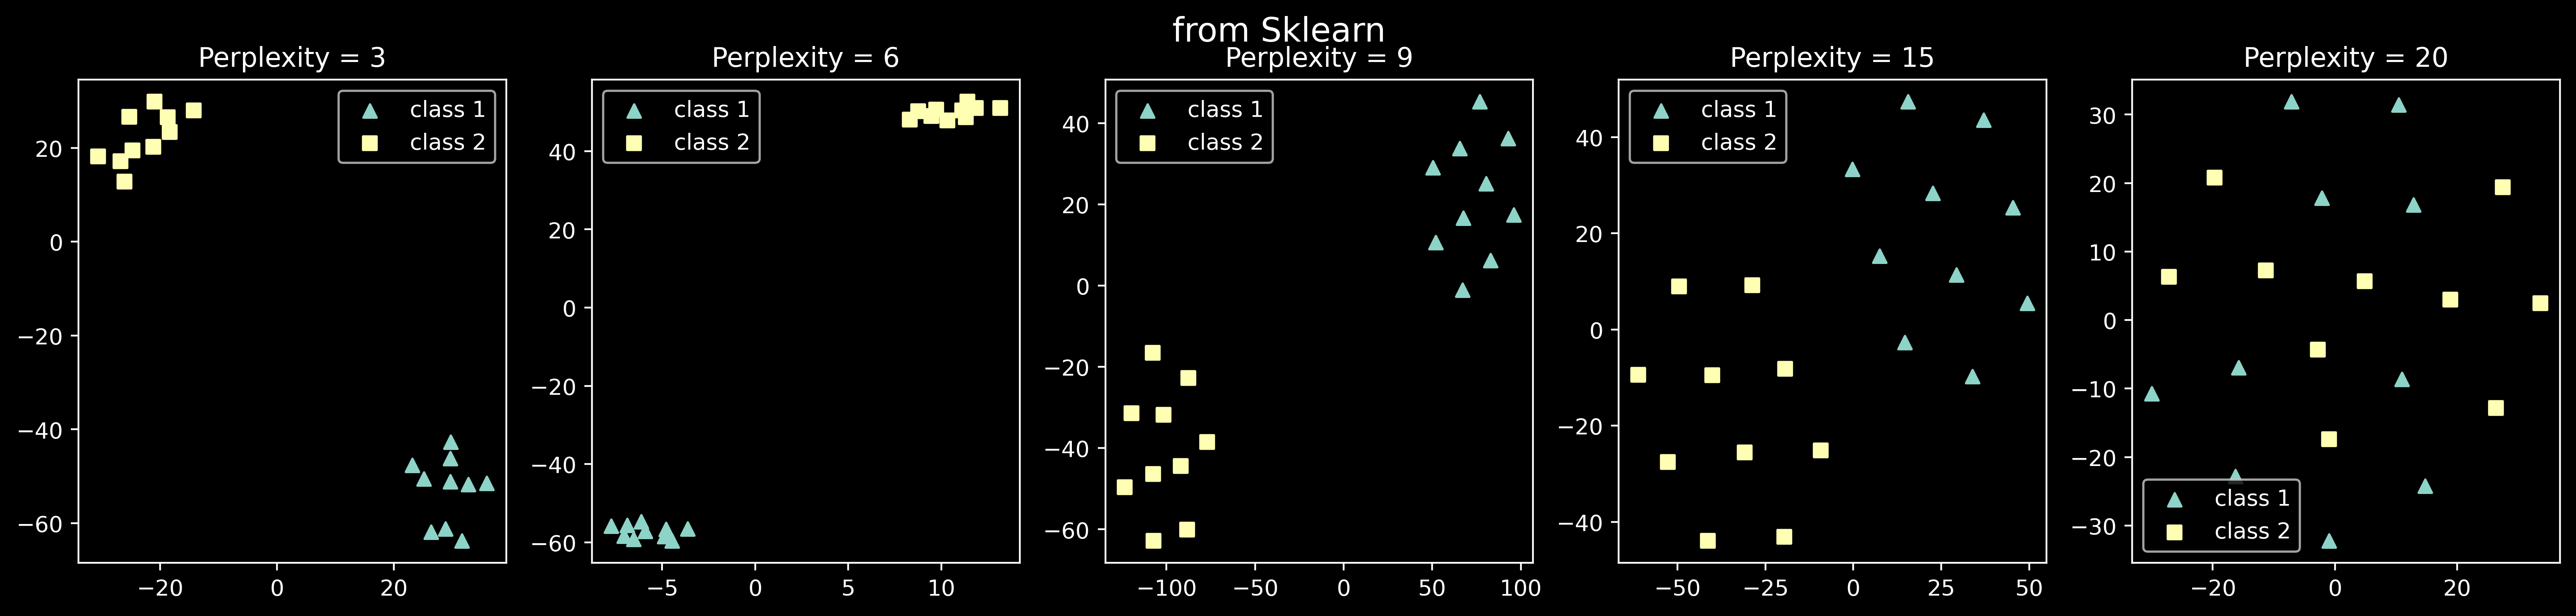

In [77]:
from sklearn.manifold import TSNE

fig = plt.figure(figsize=(20,4), dpi=400)
fig.suptitle("from Sklearn", fontsize=15)
ax = fig.subplots(1,5)

for i,p in list(enumerate([3,6,9,15,20])):
    X_embedded = TSNE(n_components=2, learning_rate='auto',\
        init='random',perplexity=p).fit_transform(X)
    ax[i].scatter(X_embedded[:10,0],X_embedded[:10,1], marker='^', label = 'class 1')
    ax[i].scatter(X_embedded[10:,0],X_embedded[10:,1], marker='s', label = 'class 2')
    ax[i].set_title("Perplexity = {}".format(p))
    ax[i].legend()
plt.show()


From the above plot it is clear that perplexity should be less than 9, the reason being that perplexity is related to the number of neighbours, we should keep the value of sigma somewhat low like $0.3$, this is done so that the probability that a distant point is a neighbour of given point would be very less. We know that in gaussian distribution more than $97\%$ of the data points lie within two std. The clusters formed by using perplexity near $6$ are forming good clusters. 